In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 651 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [ ]:
initial_data = yf.download('AVAX-USD', start='2021-01-01', end='2022-11-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,3.153535,3.873537,3.054542,3.664823,3.664823,81260736
2021-01-02,3.662164,3.937007,3.299263,3.494940,3.494940,50081958
2021-01-03,3.494292,3.826090,3.396842,3.472944,3.472944,36997985
2021-01-04,3.473519,3.831960,3.250402,3.590243,3.590243,39414734
2021-01-05,3.590670,4.343222,3.485492,4.237412,4.237412,69735075


In [ ]:
initial_data['Adj Close'].head()

Date
2021-01-01    3.664823
2021-01-02    3.494940
2021-01-03    3.472944
2021-01-04    3.590243
2021-01-05    4.237412
Name: Adj Close, dtype: float64

In [ ]:
data.head()

Date
2021-01-01    3.664823
2021-01-02    3.494940
2021-01-03    3.472944
2021-01-04    3.590243
2021-01-05    4.237412
Name: Adj Close, dtype: float64

In [ ]:
data.tail()

Date
2022-10-27    16.913971
2022-10-28    18.340309
2022-10-29    18.307974
2022-10-30    18.265606
2022-10-31    19.311609
Name: Adj Close, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f52b65ae910>],
      dtype=object)

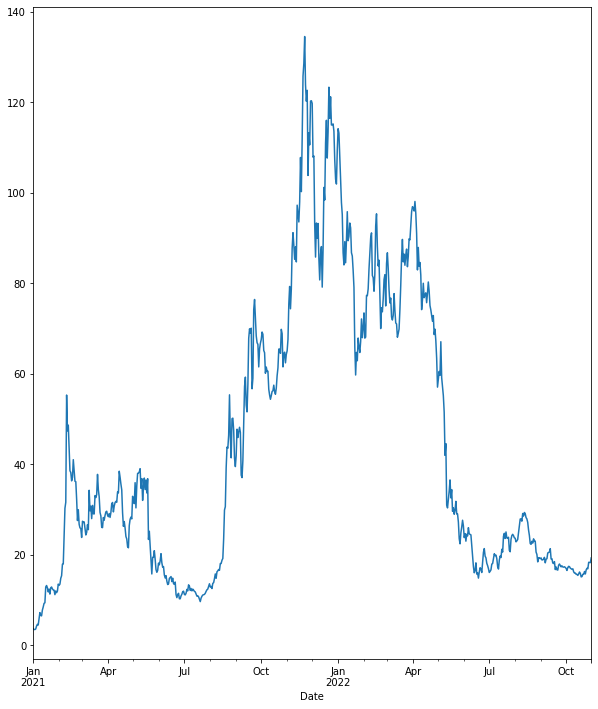

In [ ]:
data.plot(figsize=(10, 12), subplots=True)

In [ ]:
data.describe().round(2)

count    669.00
mean      43.78
std       31.29
min        3.47
25%       17.96
50%       29.61
75%       69.82
max      134.53
Name: Adj Close, dtype: float64

In [ ]:
data.diff().head()

Date
2021-01-01         NaN
2021-01-02   -0.169883
2021-01-03   -0.021996
2021-01-04    0.117299
2021-01-05    0.647169
Name: Adj Close, dtype: float64

In [ ]:
data.diff().describe().round(2)

count    668.00
mean       0.02
std        3.76
min      -18.82
25%       -1.29
50%        0.02
75%        1.29
max       23.70
Name: Adj Close, dtype: float64

In [ ]:
data.pct_change().round(4).head()

Date
2021-01-01       NaN
2021-01-02   -0.0464
2021-01-03   -0.0063
2021-01-04    0.0338
2021-01-05    0.1803
Name: Adj Close, dtype: float64

In [ ]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

Date
2021-01-01       NaN
2021-01-02   -0.0475
2021-01-03   -0.0063
2021-01-04    0.0332
2021-01-05    0.1657
Name: Adj Close, dtype: float64

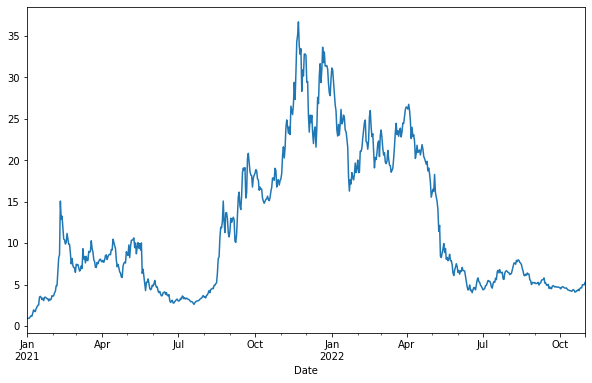

In [ ]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [ ]:
data.resample('1w', label='right').last().head()

Date
2021-01-03     3.472944
2021-01-10     6.586496
2021-01-17    13.202684
2021-01-24    12.463920
2021-01-31    13.516318
Freq: W-SUN, Name: Adj Close, dtype: float64

In [ ]:
data.resample('1m', label='right').last().head()

Date
2021-01-31    13.516318
2021-02-28    23.823219
2021-03-31    28.728970
2021-04-30    32.918373
2021-05-31    18.161320
Freq: M, Name: Adj Close, dtype: float64

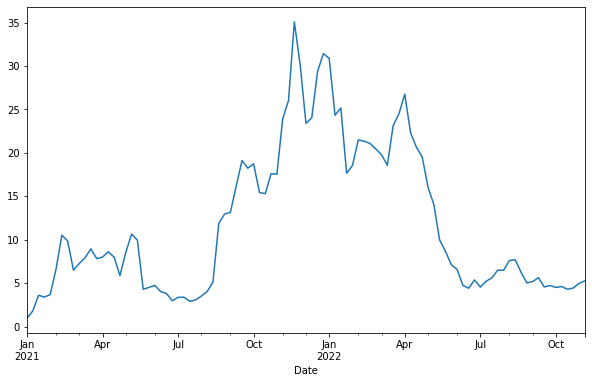

In [ ]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

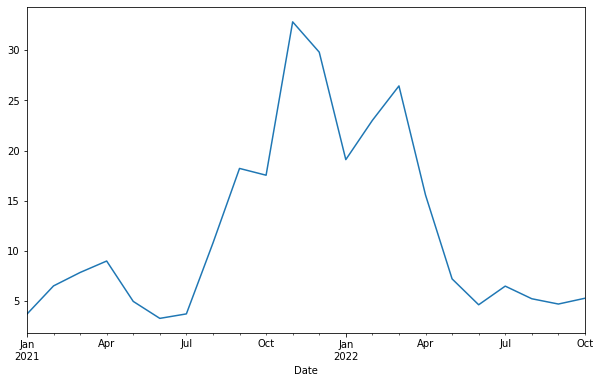

In [ ]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

In [ ]:
import numpy as np
import os

In [ ]:
S0 = 20.0              # spot stock price
K = 25.0               # strike
T = 1.0                 # maturity 
r = 0.10                 # risk free rate 
sig = 1.26               # diffusion coefficient or volatility
N = 2                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [ ]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [ ]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [ ]:
S

array([[ 20.        ,  48.749104  , 118.82375705],
       [  0.        ,   8.20527901,  20.        ],
       [  0.        ,   0.        ,   3.36633018]])

In [ ]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.31620457412150393

In [ ]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  5.        ],
       [ 0.        ,  0.        , 21.63366982]])

In [ ]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

In [ ]:
print('European ' + payoff, str( V[0,0]))

European put 11.109214874843227


In [ ]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[11.90228092,  3.25223165,  0.        ],
       [ 0.        , 16.79472099,  5.        ],
       [ 0.        ,  0.        , 21.63366982]])

In [ ]:
print('American ' + payoff, str( V[0,0]))

American put 11.902280920291346


In [ ]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [ ]:
T = 1
r = 0.05
sigma = 0.2
S0 = 100
K = 100

In [ ]:
S = mcs_simulation_np(1000)

In [ ]:
S = np.transpose(S)
S

array([[100.        , 100.58068053, 100.81004127, ..., 106.37610976,
        106.01997465, 105.83294181],
       [100.        , 100.5238331 ,  99.36504006, ..., 119.68967089,
        120.33097549, 121.68700929],
       [100.        , 100.21686525, 101.3746296 , ..., 119.420778  ,
        119.55912505, 119.05206034],
       ...,
       [100.        ,  99.67860066,  99.04782642, ...,  94.85464961,
         94.64747522,  94.95497886],
       [100.        , 100.3086806 , 100.58231021, ...,  76.78503298,
         76.65725343,  77.00373065],
       [100.        , 100.11438269, 100.8130797 , ..., 148.93422253,
        149.38100252, 149.52178321]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

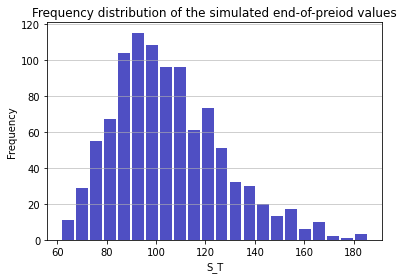

In [ ]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [ ]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 6.095915364828871


In [ ]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 11.147765369066821


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [ ]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [ ]:
euro_option_bs(20, 25, 1, 0.10, 1.26, 'call')

8.775122448005483

In [ ]:
euro_option_bs(20, 25, 1, 0.10, 1.26, 'put')

11.39605789890447

In [ ]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 25, 1, 0.10, 1.26, 'call')

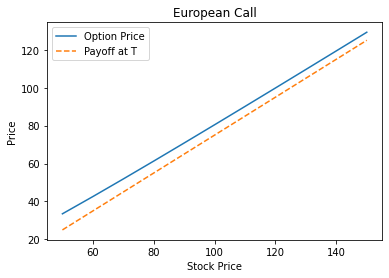

In [ ]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-25,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

In [ ]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [ ]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

10.549284934339425

In [ ]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(100, 100, T[i], 0.05, 0.03, 0.25, 'call')

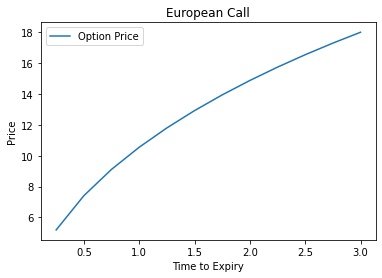

In [ ]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

In [ ]:
AVAX-USD = yf.Ticker('AVAX-USD')
opt = AVAX-USD.option_chain('2022-11-01')
opt.calls

SyntaxError: ignored

In [ ]:
data = yf.download("AVAX-USD", start="2021-01-01", end="2022-11-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data['Adj Close']

Date
2021-01-01     3.664823
2021-01-02     3.494940
2021-01-03     3.472944
2021-01-04     3.590243
2021-01-05     4.237412
                ...    
2022-10-27    16.913971
2022-10-28    18.340309
2022-10-29    18.307974
2022-10-30    18.265606
2022-10-31    19.311609
Name: Adj Close, Length: 669, dtype: float64

In [ ]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 1/52
r = 0.0382
q = 0.0061
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

NameError: ignored

In [ ]:
pip install mibian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4039 sha256=d0074f84a0cdc63ce93e7d0efd76f0bb6f9c300ae74161264f96308bfafedd96
  Stored in directory: /root/.cache/pip/wheels/bb/8e/88/9401e806f2eaf5d2f4e775e598c27d7cc09bfb06998d075093
Successfully built mibian


In [ ]:
import mibian as mb

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

In [ ]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [ ]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

10.549284934339425

In [ ]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'put')

8.627674029559998

In [ ]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')
    Put [i] = euro_option_bsm(S[i], 100, 1, 0.05, 0.03, 0.25, 'put')

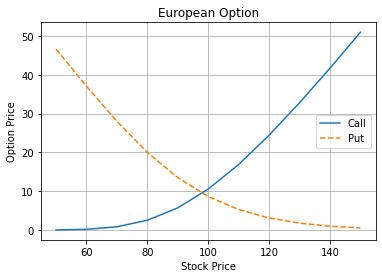

In [ ]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

In [ ]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [ ]:
delta(100, 100, 1, 0.05, 0.03, 0.25, 'call')

0.564036469670836

In [ ]:
delta(100, 100, 1, 0.05, 0.03, 0.25, 'put')

-0.4064090638776723

In [ ]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')
    Delta_Put [i] = delta(S[i], 100, 1, 0.05, 0.03, 0.25, 'put')

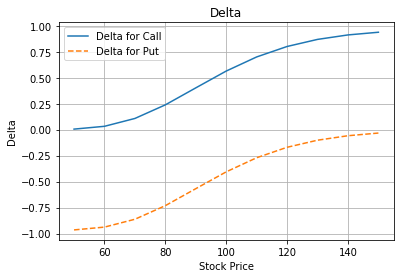

In [ ]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [ ]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [ ]:
gamma(100, 100, 1, 0.05, 0.03, 0.25, 'call')

0.01516406404157671

In [ ]:
gamma(100, 100, 1, 0.05, 0.03, 0.25, 'put')

0.01516406404157671

In [ ]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')

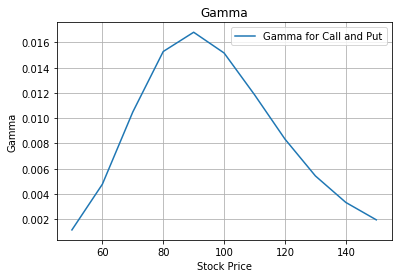

In [ ]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [ ]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [ ]:
speed(100, 100, 1, 0.05, 0.03, 0.25, 'call')

-0.00027598596555669614

In [ ]:
speed(100, 100, 1, 0.05, 0.03, 0.25, 'put')

-0.00027598596555669614

In [ ]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')

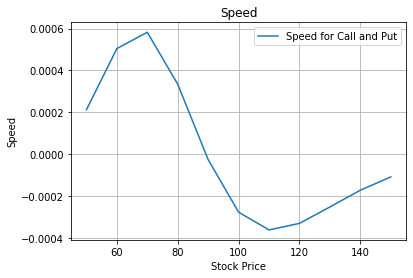

In [ ]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

In [ ]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [ ]:
theta(100, 100, 1, 0.05, 0.03, 0.25, 'call')

5.339378705617423

In [ ]:
theta(100, 100, 1, 0.05, 0.03, 0.25, 'put')

3.4945681837593776

In [ ]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(100, 100, T[i], 0.05, 0.03, 0.25, 'call')
    Theta_Put [i] = theta(100, 100, T[i], 0.05, 0.03, 0.25, 'put')

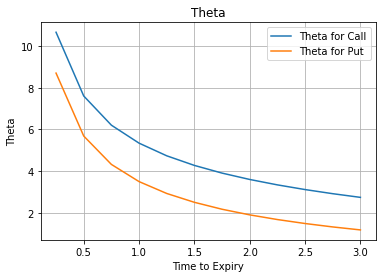

In [ ]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [ ]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [ ]:
rho(100, 100, 1, 0.05, 0.03, 0.25, 'call')

45.85436203274417

In [ ]:
rho(100, 100, 1, 0.05, 0.03, 0.25, 'put')

-49.26858041732723

In [ ]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(100, 100, 1, r[i], 0.03, 0.25, 'call')
    Rho_Put [i] = rho(100, 100, 1, r[i], 0.03, 0.25, 'put')

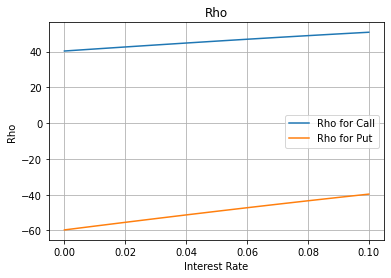

In [ ]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [ ]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [ ]:
vega(100, 100, 1, 0.05, 0.03, 0.25, 'call')

37.91016010394178

In [ ]:
vega(100, 100, 1, 0.05, 0.03, 0.25, 'put')

37.91016010394178

In [ ]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(100, 100, 1, 0.05, 0.03, vol[i], 'call')

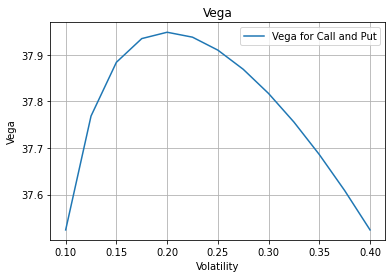

In [ ]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [ ]:
AVAX = yf.download("AVAX-USD", start="2021-01-01", end="2022-11-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
S = AVAX['Adj Close'][-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 19.31 .


In [ ]:
log_return = np.log(AVAX['Adj Close'] / AVAX['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 126.84 %


In [ ]:
log_return = np.log(VIX['Adj Close'] / VIX['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 129.07 %


In [ ]:
VIX = yf.download("^VIX", start="2021-01-01", end="2022-11-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
VIX

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,23.040001,29.190001,22.559999,26.969999,26.969999,0
2021-01-05,26.940001,28.600000,24.799999,25.340000,25.340000,0
2021-01-06,25.480000,26.770000,22.139999,25.070000,25.070000,0
2021-01-07,23.670000,23.910000,22.250000,22.370001,22.370001,0
2021-01-08,22.430000,23.340000,21.420000,21.559999,21.559999,0
...,...,...,...,...,...,...
2022-10-25,29.799999,30.000000,28.219999,28.459999,28.459999,0
2022-10-26,28.440001,28.520000,27.270000,27.280001,27.280001,0
2022-10-27,27.510000,27.670000,26.940001,27.389999,27.389999,0


In [ ]:
print('The market volatility is', round(VIX['Adj Close'][-1],2) , '% .') 

The market volatility is 25.88 % .


In [ ]:
def newton_vol_call(S, K, T, C, r):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #C: Call value
    #r: risk free rate
    #sigma: volatility of underlying asset
   
    MAX_ITERATIONS = 1000
    tolerance = 0.000001
    
    sigma = 0.25
    
    for i in range(0, MAX_ITERATIONS):
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        price = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
        vega = S * np.sqrt(T) * si.norm.pdf(d1, 0.0, 1.0)

        diff = C - price

        if (abs(diff) < tolerance):
            return sigma
        else: 
            sigma = sigma + diff/vega
        
        # print(i,sigma,diff)
        
    return sigma

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [ ]:
S = np.linspace(20, 100, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 25, T[i], 0.10, 0.00, 1.26, 'call')

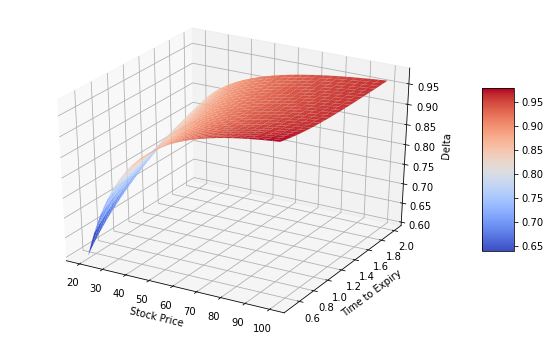

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [ ]:
d = delta(20, 25, 1, 0.1, 0.00, 1.26, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.7027 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.7027 .


In [ ]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [ ]:
S = np.linspace(20, 100, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 25, T[i], 0.1, 0.00, 1.26, 'call')

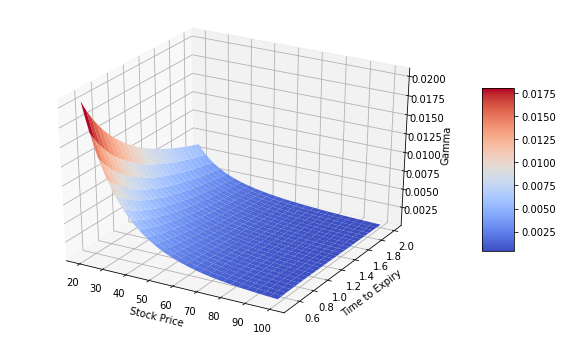

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [ ]:
g = gamma(20, 25, 1, 0.1, 0.00, 1.26, 'call')
print('The value of Gamma is', g.round(4),'.','If the stock price increase 1 dollar, then the value of the delta will increase by', g.round(4), '.')

The value of Gamma is 0.0124 . If the stock price increase 1 dollar, then the value of the delta will increase by 0.0124 .


In [ ]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [ ]:
S = np.linspace(20, 100, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 25, T[i], 0.1, 0.00, 1.26, 'call')

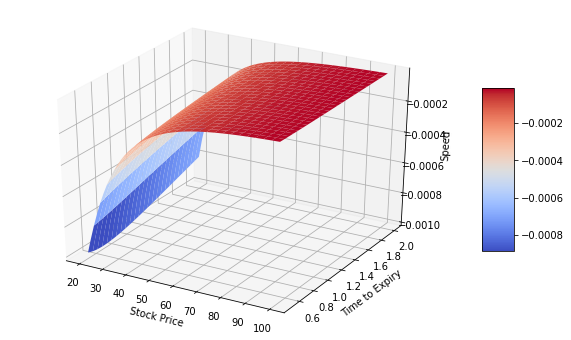

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [ ]:
s = speed(20, 25, 1, 0.1, 0.00, 1.26, 'call')
print('The value of Speed is', s.round(4),'.','If the stock price increase 1 dollar, then the value of the speed will increase by', s.round(4), '.')

The value of Speed is -0.001 . If the stock price increase 1 dollar, then the value of the speed will increase by -0.001 .


In [ ]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [ ]:
S = np.linspace(20, 100, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 25, T[i], 0.1, 0.00, 1.26, 'call')

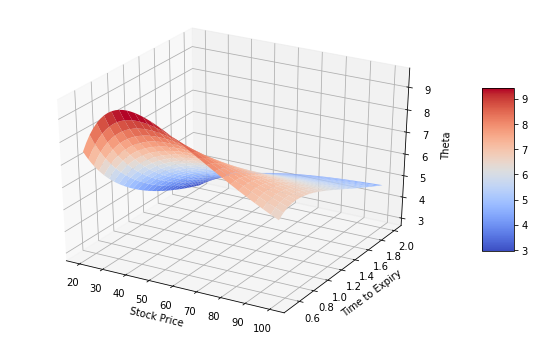

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [ ]:
t = theta(20, 25, 1, 0.1, 0.00, 1.26, 'call')
print('The value of Theta is', t.round(4),'.','Each month as the time to expiration gets closer, then the value of the derivative will go up by $', t.round(4), '.')

The value of Theta is 4.8907 . Each month as the time to expiration gets closer, then the value of the derivative will go up by $ 4.8907 .


In [ ]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [ ]:
S = np.linspace(20, 100, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 25, T[i], 0.1, 0.00, 1.26, 'call')

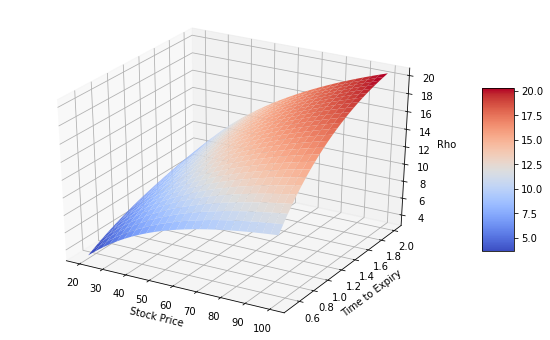

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [ ]:
r = rho(20, 25, 1, 0.1, 0.00, 1.26, 'call')
print('The value of Rho is', r.round(4),'.','If the interest rate increase 1 percent, then the value of the rho will increase by', r.round(4), '.')

The value of Rho is 5.2795 . If the interest rate increase 1 percent, then the value of the rho will increase by 5.2795 .
